In [ ]:
# !pip install polars

# Import thư viện + Load data

In [1]:
import os
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def read_parquet_by_type(train_path: str):
    # Lấy tất cả các file parquet trong thư mục
    files = [os.path.join(train_path, f) for f in os.listdir(train_path) if f.endswith('.parquet')]
    
    # Phân loại các file theo loại tên
    user_chunk_files = [file for file in files if 'user_chunk' in file]
    purchase_history_chunk_files = [file for file in files if 'purchase_history_daily_chunk' in file]
    item_chunk_files = [file for file in files if 'item_chunk' in file]
    
    # Đọc các file riêng biệt thành DataFrame
    user_chunk_df = pl.concat([pl.read_parquet(file) for file in user_chunk_files]) if user_chunk_files else None
    purchase_history_chunk_df = pl.concat([pl.read_parquet(file) for file in purchase_history_chunk_files]) if purchase_history_chunk_files else None
    item_chunk_df = pl.concat([pl.read_parquet(file) for file in item_chunk_files]) if item_chunk_files else None
    
    # Trả về một dictionary chứa các DataFrame
    return {
        "user_chunk": user_chunk_df,
        "purchase_history_chunk": purchase_history_chunk_df,
        "item_chunk": item_chunk_df
    }

In [3]:
data = read_parquet_by_type("C:/Users/tncn2/Downloads/recommendation dataset")

history_df = data["purchase_history_chunk"]
# user_df = data["user_chunk"]
# item_df = data["item_chunk"]

In [4]:
print("History DataFrame:")
history_df 

History DataFrame:


timestamp,user_id,item_id,event_type,event_value,price,date_key,quantity,customer_id,created_date,updated_date,channel,payment,location,discount,is_deleted
i64,str,str,str,"decimal[38,4]","decimal[38,4]",i32,i32,i32,datetime[μs],datetime[μs],str,str,i32,"decimal[38,4]",bool
1735064221,"""ca12702ddf55acaa9fb767e10faaa6…","""7115000000004""","""Purchase""",1.0000,49000.0000,20241224,1,5254214,2024-12-24 18:17:01.027,2024-12-24 18:20:09.453,"""In-Store""","""VietQR""",656,0.0000,false
1735068481,"""54314ce86269f4849f9a4c3fc85d94…","""0029130000030""","""Purchase""",1.0000,69000.0000,20241224,1,7573232,2024-12-24 19:28:01.870,2024-12-24 19:28:01.870,"""In-Store""","""Tiền mặt""",143,0.0000,false
1735069843,"""4799de4022b58689b2b9fb37122479…","""3496000000053""","""Purchase""",2.0000,75000.0000,20241224,2,8187418,2024-12-24 19:50:43.760,2024-12-24 19:50:43.760,"""In-Store""","""MoMo""",213,0.0000,false
1735069779,"""4799de4022b58689b2b9fb37122479…","""2700000000002""","""Purchase""",2.0000,58500.0000,20241224,2,8187418,2024-12-24 19:49:39.223,2024-12-24 19:49:39.223,"""In-Store""","""MoMo""",213,13000.0000,false
1735379373,"""3b2423f730815273dfd6f6220b0c5c…","""0029110000036""","""Purchase""",1.0000,89000.0000,20241228,1,6931560,2024-12-28 09:49:33.780,2024-12-28 10:28:49.413,"""Android""","""MoMo""",590,10000.0000,false
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1729268913,"""a6fc68430e2654c90a06f64be11a98…","""1396000000020""","""Purchase""",1.0000,28050.0000,20241018,1,6848354,2024-10-18 16:28:33.130,2024-10-18 16:28:33.130,"""In-Store""","""Tiền mặt""",446,4950.0000,false
1729345219,"""ac1dddd7c809e0b473d23f36d349eb…","""0007070000403""","""Purchase""",1.0000,189000.0000,20241019,1,5745481,2024-10-19 13:40:19.900,2024-10-19 13:40:19.900,"""iOS""","""Tiền mặt""",228,0.0000,false
1729335081,"""191d6a3053c0dfed3a2a79586e0f89…","""4371000000001""","""Purchase""",1.0000,59000.0000,20241019,1,3307869,2024-10-19 10:51:21.297,2024-10-19 10:51:21.317,"""In-Store""","""Tiền mặt""",368,0.0000,false


In [5]:
print("Rows:", history_df.height)
print("Columns:", history_df.width)

Rows: 35729825
Columns: 16


In [17]:
for col, dtype in history_df.schema.items():
    print(f"{col:30}  {dtype}")

timestamp                       Int64
user_id                         String
item_id                         String
event_type                      String
event_value                     Decimal(precision=38, scale=4)
price                           Decimal(precision=38, scale=4)
date_key                        Int32
quantity                        Int32
customer_id                     Int32
created_date                    Datetime(time_unit='us', time_zone=None)
updated_date                    Datetime(time_unit='us', time_zone=None)
channel                         String
payment                         String
location                        Int32
discount                        Decimal(precision=38, scale=4)
is_deleted                      Boolean


# Task 1 - Phân tích đơn biến

1. Thống kê đơn biến các thuộc tính numerical 

In [ ]:
output_folder = './data/history-chunk/stats'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Danh sách các cột numeric
num_cols = ["price", "discount", "event_value", "quantity"]

# Danh sách để lưu tất cả DataFrame thống kê
numeric_stats_list = []

for col in num_cols:
    print(f"\n Thống kê cho cột '{col}':")
    
    # Tính các thống kê cơ bản
    stats = history_df.select([
        pl.col(col).mean().alias("mean"),
        pl.col(col).median().alias("median"),
        pl.col(col).std().alias("std"),
        pl.col(col).min().alias("min"),
        pl.col(col).max().alias("max"),
        pl.col(col).null_count().alias("nulls"),
        pl.count().alias("total")
    ])
    
    # Thêm cột tên cho dễ nhận biết
    stats = stats.with_columns([
        pl.lit(col).alias("column")
    ]).select(["column", "mean", "median", "std", "min", "max", "nulls", "total"])
    
    # Lưu từng bảng vào danh sách tổng hợp
    numeric_stats_list.append(stats)
    
    # In ra bảng thống kê cho từng cột
    print(stats)
    
    # Lưu từng cột vào file CSV riêng
    file_path = os.path.join(output_folder, f"{col}_stats.csv")
    stats.write_csv(file_path)
    print(f"Đã lưu thống kê của '{col}' vào file: {file_path}\n")



 Thống kê cho cột 'price':


C:\Users\tncn2\AppData\Local\Temp\ipykernel_16804\2298780598.py:22: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("total")


shape: (1, 8)
┌────────┬───────────────┬─────────┬──────────────┬──────────────┬──────────────┬───────┬──────────┐
│ column ┆ mean          ┆ median  ┆ std          ┆ min          ┆ max          ┆ nulls ┆ total    │
│ ---    ┆ ---           ┆ ---     ┆ ---          ┆ ---          ┆ ---          ┆ ---   ┆ ---      │
│ str    ┆ f64           ┆ f64     ┆ f64          ┆ decimal[38,4 ┆ decimal[38,4 ┆ u32   ┆ u32      │
│        ┆               ┆         ┆              ┆ ]            ┆ ]            ┆       ┆          │
╞════════╪═══════════════╪═════════╪══════════════╪══════════════╪══════════════╪═══════╪══════════╡
│ price  ┆ 169188.742494 ┆ 87000.0 ┆ 195539.88976 ┆ 0.0444       ┆ 20990000.000 ┆ 0     ┆ 35729825 │
│        ┆               ┆         ┆              ┆              ┆ 0            ┆       ┆          │
└────────┴───────────────┴─────────┴──────────────┴──────────────┴──────────────┴───────┴──────────┘
Đã lưu thống kê của 'price' vào file: ./data/history-chunk/stats\price_stats.

2. Thống kê tần suất các thuộc tính categorical 

In [8]:
output_folder = './data/history-chunk/counts'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Các cột phân loại
categorical_columns = [
    'event_type', 'channel', 'payment', 'location', 'is_deleted',
    'created_date', 'updated_date', 'customer_id', 'user_id', 'timestamp'
]

# Danh sách để lưu các DataFrame tần suất
value_counts_list = []

# Duyệt từng cột
for col in categorical_columns:
    # Đếm tần suất xuất hiện của mỗi giá trị duy nhất
    value_counts = history_df[col].value_counts(sort=True)
    
    # Đổi tên cột cho rõ ràng
    value_counts = value_counts.rename({
        "count": f"{col}_count",
        col: f"{col}_value"
    })
    
    # Lưu DataFrame vào danh sách
    value_counts_list.append(value_counts)
    
    # Lưu ra file CSV riêng cho từng cột
    file_path = os.path.join(output_folder, f"{col}_value_counts.csv")
    value_counts.write_csv(file_path)
    
    # In kết quả
    print(f"Tần suất cho cột '{col}':")
    print(value_counts)
    print(f"✅ Đã lưu vào file: {file_path}\n")

Tần suất cho cột 'event_type':
shape: (1, 2)
┌──────────────────┬──────────────────┐
│ event_type_value ┆ event_type_count │
│ ---              ┆ ---              │
│ str              ┆ u32              │
╞══════════════════╪══════════════════╡
│ Purchase         ┆ 35729825         │
└──────────────────┴──────────────────┘
✅ Đã lưu vào file: ./data/history-chunk/counts\event_type_value_counts.csv

Tần suất cho cột 'channel':
shape: (11, 2)
┌────────────────┬───────────────┐
│ channel_value  ┆ channel_count │
│ ---            ┆ ---           │
│ str            ┆ u32           │
╞════════════════╪═══════════════╡
│ In-Store       ┆ 33016358      │
│ iOS            ┆ 1397128       │
│ SPE            ┆ 602896        │
│ Android        ┆ 483885        │
│ Web            ┆ 146401        │
│ …              ┆ …             │
│ CRM Partner    ┆ 16640         │
│ Chat           ┆ 2310          │
│ Wholesale      ┆ 162           │
│ Không xác định ┆ 119           │
│ TKS            ┆ 2           

- Mode của các thuộc tính categorical

In [20]:
output_folder = './data/history-chunk/mode'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Các cột phân loại
categorical_columns = [
    'event_type', 'channel', 'payment', 'location', 'is_deleted',
    'created_date', 'updated_date', 'customer_id', 'user_id', 'timestamp'
]

# Danh sách để lưu DataFrame từng cột
mode_dataframes = []

# Tính mode cho mỗi cột
for col in categorical_columns:
    # Nếu là datetime thì cast sang string để tránh lỗi
    if history_df[col].dtype == pl.Datetime:
        mode_val = history_df[col].cast(pl.Utf8).mode()[0]
    else:
        mode_val = history_df[col].mode()[0]
    
    # Ép kiểu về string
    mode_val = str(mode_val)
    
    # Tạo DataFrame lưu tên cột + mode
    mode_df = pl.DataFrame({
        "Column": [col],
        "Mode": [mode_val]
    })
    
    mode_dataframes.append(mode_df)
    print(f"Mode của cột '{col}': {mode_val}")

# Gộp tất cả DataFrame lại thành một bảng duy nhất
final_mode_df = pl.concat(mode_dataframes, how="vertical")

# Lưu bảng mode tổng hợp ra một file CSV
final_file_path = os.path.join(output_folder, "categorical_mode_summary.csv")
final_mode_df.write_csv(final_file_path)

print(f"\nĐã lưu file tổng hợp mode cho tất cả cột vào: {final_file_path}")

Mode của cột 'event_type': Purchase
Mode của cột 'channel': In-Store
Mode của cột 'payment': Tiền mặt
Mode của cột 'location': 645
Mode của cột 'is_deleted': False
Mode của cột 'created_date': 2024-06-20 10:01:45.733000
Mode của cột 'updated_date': 2024-02-05 07:08:29.130000
Mode của cột 'customer_id': 5040968
Mode của cột 'user_id': 7f1ad828d8fd0bf64642908060fe5cbdaa5ace25fbf643ffd729f0f1c8812c33
Mode của cột 'timestamp': 1718877705

Đã lưu file tổng hợp mode cho tất cả cột vào: ./data/history-chunk/mode\categorical_mode_summary.csv


In [11]:
history_df = history_df.with_columns([
    pl.col(col).cast(pl.Float64)
    for col, dtype in history_df.schema.items()
    if "Decimal" in str(dtype)
])

In [5]:
price_np = history_df["price"].cast(pl.Float64).to_numpy()

# Tính ngưỡng 99th percentile
threshold = np.percentile(price_np, 99)

# Lọc outlier
outliers = history_df.filter(pl.col("price").cast(pl.Float64) > threshold)

print("Ngưỡng 99%:", threshold)
print("Số lượng outlier:", outliers.height)

Ngưỡng 99%: 805000.0
Số lượng outlier: 347380


In [12]:
price_np = history_df["price"].cast(pl.Float64).to_numpy()

# Bước 2: Tính các giá trị phân vị (quartile)
Q1 = np.percentile(price_np, 25)
Q3 = np.percentile(price_np, 75)
IQR = Q3 - Q1

# Bước 3: Tính giới hạn phát hiện outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Bước 4: Lọc ra các giá trị outlier
outliers_iqr_price = history_df.filter(
    (pl.col("price").cast(pl.Float64) < lower_bound) |
    (pl.col("price").cast(pl.Float64) > upper_bound)
)

# Bước 5: In kết quả thống kê
print("Thống kê IQR cho cột 'price'")
print(f"Q1 (25%): {Q1:,.2f}")
print(f"Q3 (75%): {Q3:,.2f}")
print(f"IQR (Q3 - Q1): {IQR:,.2f}")
print(f"Ngưỡng dưới (Lower bound): {lower_bound:,.2f}")
print(f"Ngưỡng trên (Upper bound): {upper_bound:,.2f}")
print(f"Số lượng outlier: {outliers_iqr_price.height:,}")
print(f"Tỉ lệ outlier: {outliers_iqr_price.height / history_df.height:.2%}")

Thống kê IQR cho cột 'price'
Q1 (25%): 48,316.39
Q3 (75%): 244,000.00
IQR (Q3 - Q1): 195,683.61
Ngưỡng dưới (Lower bound): -245,209.02
Ngưỡng trên (Upper bound): 537,525.41
Số lượng outlier: 2,307,238
Tỉ lệ outlier: 6.46%


In [37]:
outdir = "./images/history-chunk"
os.makedirs(outdir, exist_ok=True)

# 1) số đơn/khách
orders_per_cust = (
    history_df
    .select("customer_id")
    .drop_nulls()
    .group_by("customer_id")
    .len()
    .rename({"len": "n_orders"})
)

# 2) thống kê nhanh & lưu CSV
summary = orders_per_cust.select([
    pl.len().alias("n_customers"),
    pl.col("n_orders").sum().alias("total_orders"),
    pl.col("n_orders").mean().alias("avg_orders_per_customer"),
    pl.col("n_orders").median().alias("median_orders"),
    pl.col("n_orders").quantile(0.9).alias("p90"),
    pl.col("n_orders").quantile(0.99).alias("p99"),
    pl.col("n_orders").max().alias("max_orders"),
])
summary_csv = os.path.join(outdir, "orders_per_customer_summary.csv")
summary.write_csv(summary_csv)
print("✅ Summary CSV:", summary_csv)

✅ Summary CSV: ./images/history-chunk\orders_per_customer_summary.csv


## Visualize đơn biến

## Biểu đồ histogram + boxplot 
- Các thuộc tính numerical: "price", "discount", "quantity", "event_value"
- Log_transform vì có nhiều outlier lớn khiến plot bị lệch

In [5]:
# --- Đường dẫn thư mục lưu ảnh ---
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

# --- Lấy dữ liệu và log-transform ---
price_np = history_df["price"].cast(pl.Float64).to_numpy()
price_log = np.log1p(price_np)  # log(1 + x) để tránh log(0)

# --- Vẽ figure gồm 2 biểu đồ (histogram + boxplot) ---
plt.figure(figsize=(9, 6))

# Histogram (ở trên)
plt.subplot(2, 1, 1)
sns.histplot(price_log, bins=50, kde=True, color="skyblue")
plt.title("Histogram của log(price)")
plt.xlabel("")
plt.ylabel("Tần suất")

# Boxplot (ở dưới)
plt.subplot(2, 1, 2)
sns.boxplot(x=price_log, color="lightgreen")
plt.title("Boxplot của log(price)")
plt.xlabel("log(price)")

# Căn chỉnh layout cho đẹp
plt.tight_layout()

# --- Lưu ảnh ---
output_path = os.path.join(output_folder, "log_price_combined.png")
plt.savefig(output_path, bbox_inches="tight", dpi=300)
plt.close()

print(f"✅ Đã lưu biểu đồ kết hợp histogram + boxplot tại: {output_path}")

✅ Đã lưu biểu đồ kết hợp histogram + boxplot tại: ./images/history-chunk\log_price_combined.png


In [6]:
# --- Thư mục lưu ảnh ---
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

# --- Lấy dữ liệu discount và log-transform ---
discount_np = history_df["discount"].cast(pl.Float64).to_numpy()

# Loại bỏ giá trị âm hoặc None trước khi log-transform
discount_np = discount_np[~np.isnan(discount_np)]
discount_np = discount_np[discount_np >= 0]

discount_log = np.log1p(discount_np)  # log(1 + x)

# --- Vẽ figure gồm 2 biểu đồ ---
plt.figure(figsize=(9, 6))

# Histogram (phía trên)
plt.subplot(2, 1, 1)
sns.histplot(discount_log, bins=50, kde=True, color="orange")
plt.title("Histogram của log(discount)")
plt.xlabel("")
plt.ylabel("Tần suất")

# Boxplot (phía dưới)
plt.subplot(2, 1, 2)
sns.boxplot(x=discount_log, color="lightcoral")
plt.title("Boxplot của log(discount)")
plt.xlabel("log(discount)")

# Căn chỉnh layout
plt.tight_layout()

# --- Lưu hình ---
output_path = os.path.join(output_folder, "log_discount_combined.png")
plt.savefig(output_path, bbox_inches="tight", dpi=300)
plt.close()

print(f"✅ Đã lưu biểu đồ kết hợp histogram + boxplot tại: {output_path}")

✅ Đã lưu biểu đồ kết hợp histogram + boxplot tại: ./images/history-chunk\log_discount_combined.png


In [7]:
# --- Thư mục lưu ảnh ---
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

# --- Lấy dữ liệu quantity và log-transform ---
quantity_np = history_df["quantity"].cast(pl.Float64).to_numpy()

# Loại bỏ giá trị None hoặc âm (nếu có)
quantity_np = quantity_np[~np.isnan(quantity_np)]
quantity_np = quantity_np[quantity_np >= 0]

# Log-transform (log1p để tránh log(0))
quantity_log = np.log1p(quantity_np)

# --- Vẽ figure gồm 2 biểu đồ ---
plt.figure(figsize=(9, 6))

# Histogram (phía trên)
plt.subplot(2, 1, 1)
sns.histplot(quantity_log, bins=50, kde=True, color="skyblue")
plt.axvline(np.median(quantity_log), color='red', linestyle='--', label='Median')
plt.title("Phân bố log(quantity)", fontsize=12)
plt.ylabel("Tần suất", fontsize=11)
plt.legend()

# Boxplot (phía dưới)
plt.subplot(2, 1, 2)
sns.boxplot(x=quantity_log, color="lightblue")
plt.title("Boxplot log(quantity)", fontsize=12)
plt.xlabel("log(quantity)", fontsize=11)

# Căn chỉnh layout cho đẹp
plt.tight_layout()

# --- Lưu hình ---
output_path = os.path.join(output_folder, "log_quantity_combined.png")
plt.savefig(output_path, bbox_inches="tight", dpi=300)
plt.close()

print(f"✅ Đã lưu biểu đồ kết hợp histogram + boxplot tại: {output_path}")

✅ Đã lưu biểu đồ kết hợp histogram + boxplot tại: ./images/history-chunk\log_quantity_combined.png


In [9]:
# --- Thư mục lưu ảnh ---
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

# --- Lấy dữ liệu event_value và log-transform ---
event_value_np = history_df["event_value"].cast(pl.Float64).to_numpy()

# Loại bỏ giá trị NaN hoặc âm (vì log không nhận giá trị âm)
event_value_np = event_value_np[~np.isnan(event_value_np)]
event_value_np = event_value_np[event_value_np >= 0]

# Log-transform: log(1 + x)
event_value_log = np.log1p(event_value_np)

# --- Vẽ figure gồm 2 biểu đồ ---
plt.figure(figsize=(10, 6))

# Histogram (phía trên)
plt.subplot(2, 1, 1)
sns.histplot(event_value_log, bins=50, kde=True, color="mediumseagreen", stat='count')
plt.axvline(np.median(event_value_log), color='red', linestyle='--', label='Median')
plt.title("Phân bố log(event_value)", fontsize=12)
plt.ylabel("Tần suất", fontsize=11)
plt.legend()

# Boxplot (phía dưới)
plt.subplot(2, 1, 2)
sns.boxplot(x=event_value_log, color="palegreen", fliersize=2)
plt.title("Boxplot log(event_value)", fontsize=12)
plt.xlabel("log(event_value)", fontsize=11)

# Căn chỉnh layout
plt.tight_layout()

# --- Lưu hình ---
output_path = os.path.join(output_folder, "log_event_value_combined.png")
plt.savefig(output_path, bbox_inches="tight", dpi=300)
plt.close()

print(f"✅ Đã lưu biểu đồ kết hợp histogram + boxplot tại: {output_path}")

✅ Đã lưu biểu đồ kết hợp histogram + boxplot tại: ./images/history-chunk\log_event_value_combined.png


## Biểu đồ phân bố 
- Các thuộc tính categorical: "channel", "payment", "location"

In [32]:
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

categorical_cols = ["channel", "payment", "location"]

for col in categorical_cols:
    if col not in history_df.columns:
        print(f"Cột '{col}' không tồn tại trong history_df, bỏ qua.")
        continue

    counts_df = (
        history_df
        .select(col)
        .fill_null("Unknown")
        .group_by(col)
        .len()
        .sort("len", descending=True)
    )

    labels = counts_df[col].to_list()
    counts = counts_df["len"].to_list()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=labels, y=counts, palette="viridis")

    for i, v in enumerate(counts):
        plt.text(i, v, f"{v:,}", ha='center', va='bottom', fontsize=8)

    plt.yscale("log")

    plt.title(f"Phân bố (log scale) theo {col}", fontsize=13)
    plt.xlabel(col.capitalize(), fontsize=11)
    plt.ylabel("Số lượng bản ghi (log scale)", fontsize=11)
    plt.xticks(rotation=30, ha="right")

    plt.tight_layout()

    # --- Lưu hình ---
    output_path = os.path.join(output_folder, f"{col}_distribution_log.png")
    plt.savefig(output_path, bbox_inches="tight", dpi=300)
    plt.close()

    print(f"✅ Đã lưu biểu đồ LOG phân bố cho '{col}' tại: {output_path}")

C:\Users\tncn2\AppData\Local\Temp\ipykernel_22068\3350282887.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channels, y=counts, palette="viridis")


✅ Đã lưu biểu đồ phân bố channel tại: ./images/history-chunk\channel_distribution.png


In [ ]:
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

# --- Danh sách các cột phân loại cần vẽ ---
categorical_cols = ["channel", "payment", "location"]

# --- Lặp qua từng cột ---
for col in categorical_cols:
    if col not in history_df.columns:
        print(f"Cột '{col}' không tồn tại trong history_df, bỏ qua.")
        continue

    # --- Đếm tần suất từng giá trị ---
    counts_df = (
        history_df
        .select(col)
        .fill_null("Unknown")
        .group_by(col)
        .len()
        .sort("len", descending=True)
    )

    # Lấy dữ liệu để vẽ
    labels = counts_df[col].to_list()
    counts = counts_df["len"].to_list()

    # --- Vẽ biểu đồ ---
    plt.figure(figsize=(10, 6))
    sns.barplot(x=labels, y=counts, palette="viridis")

    # Thêm số lượng lên cột (hiển thị giá trị thật, không log)
    for i, v in enumerate(counts):
        plt.text(i, v, f"{v:,}", ha='center', va='bottom', fontsize=8)

    # --- Thiết lập trục Y theo log ---
    plt.yscale("log")

    # --- Nhãn và tiêu đề ---
    plt.title(f"Phân bố (log scale) theo {col}", fontsize=13)
    plt.xlabel(col.capitalize(), fontsize=11)
    plt.ylabel("Số lượng bản ghi (log scale)", fontsize=11)
    plt.xticks(rotation=30, ha="right")

    plt.tight_layout()

    # --- Lưu hình ---
    output_path = os.path.join(output_folder, f"{col}_distribution_log.png")
    plt.savefig(output_path, bbox_inches="tight", dpi=300)
    plt.close()

    print(f"✅ Đã lưu biểu đồ LOG phân bố cho '{col}' tại: {output_path}")

C:\Users\tncn2\AppData\Local\Temp\ipykernel_22068\3797959943.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="viridis")


✅ Đã lưu biểu đồ LOG phân bố cho 'channel' tại: ./images/history-chunk\channel_distribution_log.png


C:\Users\tncn2\AppData\Local\Temp\ipykernel_22068\3797959943.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="viridis")


✅ Đã lưu biểu đồ LOG phân bố cho 'payment' tại: ./images/history-chunk\payment_distribution_log.png


C:\Users\tncn2\AppData\Local\Temp\ipykernel_22068\3797959943.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="viridis")


✅ Đã lưu biểu đồ LOG phân bố cho 'location' tại: ./images/history-chunk\location_distribution_log.png


In [7]:

# --- Thư mục lưu ảnh ---
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

# --- Xử lý dữ liệu cột 'location' ---
counts_df = (
    history_df
    .select("location")
    .fill_null("Unknown")
    .group_by("location")
    .len()
    .sort("len", descending=True)
    .head(10)  
)

# Lấy dữ liệu để vẽ
labels = counts_df["location"].to_list()
counts = counts_df["len"].to_numpy()

# --- Log-transform ---
counts_log = np.log1p(counts)  # log(1 + x) để tránh log(0)

# --- Vẽ biểu đồ ---
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts_log, palette="viridis")

# Thêm nhãn giá trị thật (chưa log)
for i, v in enumerate(counts):
    plt.text(i, np.log1p(v), f"{v:,}", ha='center', va='bottom', fontsize=9)

# --- Nhãn và tiêu đề ---
plt.title("Phân bố (log-transform) Top 10 Location", fontsize=13)
plt.xlabel("Location", fontsize=11)
plt.ylabel("log(1 + Số lượng bản ghi)", fontsize=11)
plt.xticks(rotation=30, ha="right")

plt.tight_layout()

# --- Lưu hình ---
output_path = os.path.join(output_folder, "location_distribution_log_top10.png")
plt.savefig(output_path, bbox_inches="tight", dpi=300)
plt.close()

print(f"✅ Đã lưu biểu đồ log-transform top 10 location tại: {output_path}")

C:\Users\tncn2\AppData\Local\Temp\ipykernel_22068\1178360574.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts_log, palette="viridis")


✅ Đã lưu biểu đồ log-transform top 10 location tại: ./images/history-chunk\location_distribution_log_top10.png


[timestamp] n=35,729,825 | null=0 | unique=10,250,864
min=1,704,091,499  p1=1,704,397,589  p25=1,711,989,850  median=1,719,947,212  p75=1,727,898,922  p99=1,735,404,080  max=1,735,684,519


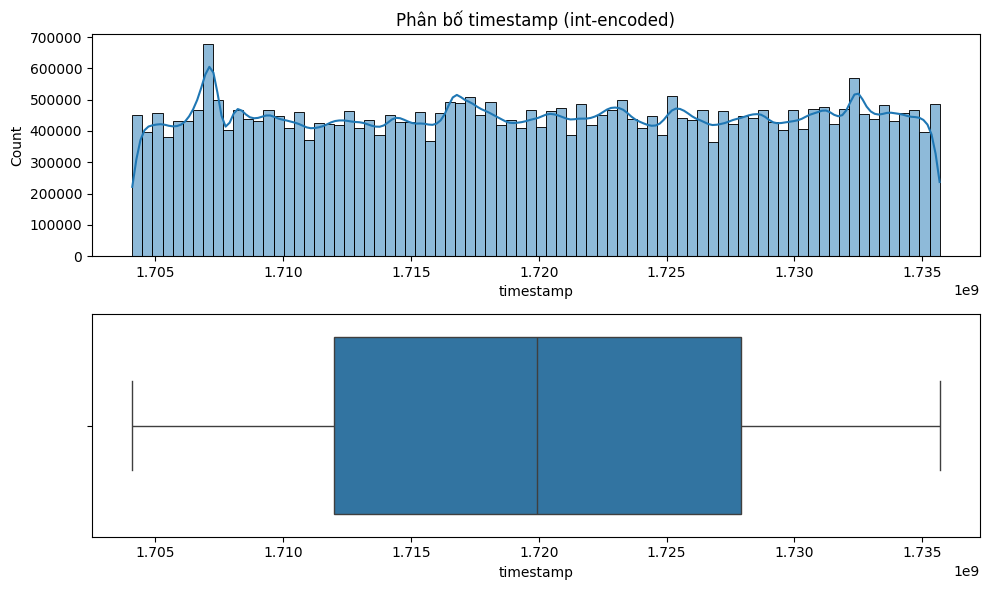

In [50]:
def univariate_int_timestamp(df: pl.DataFrame, col: str = "timestamp", use_log_x: bool = False):

    s = df[col]

    if s.dtype != pl.Int64 and s.dtype != pl.UInt64:
        s = s.cast(pl.Int64)
    s = s.drop_nulls()

    n = s.len()
    n_null = df[col].null_count()
    n_unique = s.n_unique()
    arr = s.to_numpy()
    p = np.percentile(arr, [1, 25, 50, 75, 99])

    print(f"[{col}] n={n:,} | null={int(n_null):,} | unique={int(n_unique):,}")
    print(f"min={arr.min():,}  p1={int(p[0]):,}  p25={int(p[1]):,}  "
          f"median={int(p[2]):,}  p75={int(p[3]):,}  p99={int(p[4]):,}  max={arr.max():,}")

    plt.figure(figsize=(10, 6))

    # Histogram
    plt.subplot(2, 1, 1)
    sns.histplot(arr, bins=80, kde=True)
    if use_log_x:
        plt.xscale("log")
        plt.xlabel(f"{col} (log scale)")
    else:
        plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Phân bố {col} (int-encoded)")

    # Boxplot
    plt.subplot(2, 1, 2)
    sns.boxplot(x=arr, fliersize=2)
    if use_log_x:
        plt.xscale("log")
        plt.xlabel(f"{col} (log scale)")
    else:
        plt.xlabel(col)
    plt.tight_layout()
    plt.show()

univariate_int_timestamp(history_df, col="timestamp", use_log_x=False)


In [39]:
vals = [int(x) for x in orders_per_cust["n_orders"].to_list() if x is not None]

# Histogram chuẩn (số đếm)
plt.figure(figsize=(9,5))
sns.histplot(vals, bins=50)
plt.title("Phân bố số đơn theo khách hàng")
plt.xlabel("Số đơn/khách")
plt.ylabel("Số khách")
plt.tight_layout()
path1 = os.path.join(outdir, "cust_orders_hist.png")
plt.savefig(path1, dpi=300, bbox_inches="tight"); plt.close()
print("Lưu:", path1)

# Histogram trên trục X log1p (nhìn rõ long-tail)
plt.figure(figsize=(9,5))
sns.histplot(np.log1p(vals), bins=50)
plt.title("Phân bố số đơn theo khách (trục log1p)")
plt.xlabel("log1p(Số đơn/khách)")
plt.ylabel("Số khách")
plt.tight_layout()
path2 = os.path.join(outdir, "cust_orders_hist_log1p.png")
plt.savefig(path2, dpi=300, bbox_inches="tight"); plt.close()
print("Lưu:", path2)

Lưu: ./images/history-chunk\cust_orders_hist.png
Lưu: ./images/history-chunk\cust_orders_hist_log1p.png


### Phân tích phân bố số đơn hàng theo khách hàng (log1p)

Biểu đồ trên thể hiện **phân bố số đơn hàng của từng khách hàng** sau khi áp dụng phép biến đổi log1p để giảm độ lệch.

**Nhận xét:**
- Phân bố **lệch phải rất mạnh (right-skewed)**: phần lớn khách hàng chỉ có **1–2 đơn hàng**, trong khi một số rất ít khách hàng có số đơn cao hơn nhiều, kéo đuôi phân bố dài sang phải.  
- Đường histogram có dạng **“răng cưa” (lòi lõm)** là do dữ liệu **rời rạc (integer)** — các giá trị như 1, 2, 3, 5, 10 đơn thường xuất hiện nhiều hơn hẳn, tạo các “đỉnh” xen kẽ.  
- Hiện tượng này là **bình thường**, phản ánh đúng hành vi mua sắm thực tế:  
  phần lớn người dùng chỉ mua 1–2 lần, trong khi nhóm nhỏ khách hàng trung thành mua rất nhiều.

**Kết luận:**  
Dữ liệu **không có bất thường nghiêm trọng**, nhưng **rất mất cân bằng** giữa nhóm khách hàng ít mua và nhóm khách hàng thường xuyên


# Task 2

In [14]:
from scipy.stats import chi2_contingency
# --- Danh sách các cột phân loại ---
categorical_columns = ["channel", "payment", "location"]

# --- Dictionary lưu kết quả ---
results = {}

# --- Lặp qua từng cặp biến phân loại ---
for i, col1 in enumerate(categorical_columns):
    for col2 in categorical_columns[i + 1:]:
        print(f"🔹 Processing Chi-squared test for {col1} × {col2} ...")

        # Tạo bảng tần suất (contingency table)
        contingency_df = (
            history_df
            .select([col1, col2])
            .fill_null("Unknown")                # thay thế giá trị null
            .group_by([col1, col2])
            .len()                               # đếm số lượng từng tổ hợp
            .pivot(values="len", index=col1, columns=col2)
            .fill_null(0)                        # thay null bằng 0
        )

        # Lấy dữ liệu dạng numpy
        contingency_table = contingency_df.select(pl.exclude(col1)).to_numpy()

        # Nếu bảng quá nhỏ hoặc chỉ có 1 hàng/cột thì bỏ qua
        if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
            print(f"⚠️ Bỏ qua {col1} × {col2} (chỉ có 1 giá trị duy nhất trong 1 biến)")
            continue

        # 3️⃣ Thực hiện kiểm định Chi-squared
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # 4️⃣ Lưu kết quả
        results[(col1, col2)] = {
            "chi2_statistic": chi2,
            "p_value": p,
            "degrees_of_freedom": dof,
            "significant": p < 0.05
        }

# --- In kết quả ---
print("\nKết quả kiểm định Chi-squared giữa các cặp biến phân loại:\n")
for (col1, col2), result in results.items():
    print(f"{col1} × {col2}:")
    print(f"  → χ² = {result['chi2_statistic']:.2f}, p = {result['p_value']:.4f}, df = {result['degrees_of_freedom']}")
    if result["significant"]:
        print("Có mối liên hệ có ý nghĩa thống kê (p < 0.05)")
    else:
        print("Không có mối liên hệ đáng kể (p ≥ 0.05)")
    print()

🔹 Processing Chi-squared test for channel × payment ...


C:\Users\tncn2\AppData\Local\Temp\ipykernel_22068\3055133420.py:20: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(values="len", index=col1, columns=col2)


🔹 Processing Chi-squared test for channel × location ...
🔹 Processing Chi-squared test for payment × location ...

Kết quả kiểm định Chi-squared giữa các cặp biến phân loại:

channel × payment:
  → χ² = 24857243.86, p = 0.0000, df = 90
Có mối liên hệ có ý nghĩa thống kê (p < 0.05)

channel × location:
  → χ² = 37228229.48, p = 0.0000, df = 7640
Có mối liên hệ có ý nghĩa thống kê (p < 0.05)

payment × location:
  → χ² = 7279800.00, p = 0.0000, df = 6876
Có mối liên hệ có ý nghĩa thống kê (p < 0.05)



**Nhận xét:**
- Tất cả các cặp biến đều có **p-value < 0.05**, chứng tỏ **các biến phân loại không độc lập** với nhau.  
- Cụ thể:
  - **Channel và Payment** có mối liên hệ rõ ràng — hình thức thanh toán thường phụ thuộc vào kênh bán hàng (ví dụ: cửa hàng thường dùng tiền mặt, online ưu tiên ví điện tử).  
  - **Channel và Location** cũng liên quan chặt chẽ — một số địa điểm chỉ hỗ trợ một số kênh bán cụ thể.  
  - **Payment và Location** cho thấy hình thức thanh toán thay đổi theo khu vực (vùng trung tâm có thể phổ biến QR, vùng khác chủ yếu tiền mặt).  

In [18]:
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

categorical_cols = ["channel", "payment", "location"]

def cramers_v_pl(df: pl.DataFrame, col1: str, col2: str) -> float:
    # Bảng tần suất
    freq_df = (
        df
        .select([col1, col2])
        .fill_null("Unknown")
        .group_by([col1, col2])
        .len()
    )

    # Pivot sang ma trận tần suất
    pivot_df = (
        freq_df
        .pivot(values="len", index=col1, columns=col2, aggregate_function=None)
        .fill_null(0)
    )

    # Nếu thiếu chiều, trả về NaN
    if pivot_df.height < 2 or (pivot_df.width - 1) < 2:
        return np.nan

    # Chỉ giữ cột số và ép kiểu về float để tránh dtype=object
    numeric_df = (
        pivot_df
        .drop(col1)                              # bỏ cột index
        .select(pl.all().cast(pl.Float64))       # ép tất cả cột về số
    )

    contingency_table = numeric_df.to_numpy()    # ndarray float

    # Chi-squared
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum()
    k = min(contingency_table.shape) - 1
    if n == 0 or k == 0:
        return np.nan
    return float(np.sqrt(chi2 / (n * k)))

# Tính ma trận Cramer's V
n = len(categorical_cols)
cramer_matrix = np.zeros((n, n))
for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
        if i == j:
            cramer_matrix[i, j] = 1.0
        else:
            cramer_matrix[i, j] = cramers_v_pl(history_df, col1, col2)
        print(f"Cramér’s V({col1}, {col2}) = {cramer_matrix[i, j]:.3f}")

# Vẽ & lưu heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    cramer_matrix, annot=True, cmap="YlOrBr", fmt=".2f",
    xticklabels=categorical_cols, yticklabels=categorical_cols, square=True
)
plt.title("Ma trận Cramér’s V giữa các biến phân loại", fontsize=13)
plt.tight_layout()

output_path = os.path.join(output_folder, "cramers_v_matrix.png")
plt.savefig(output_path, bbox_inches="tight", dpi=300)
plt.close()
print(f"\n Đã lưu biểu đồ Cramér’s V tại: {output_path}")

Cramér’s V(channel, channel) = 1.000


C:\Users\tncn2\AppData\Local\Temp\ipykernel_22068\358987356.py:19: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(values="len", index=col1, columns=col2, aggregate_function=None)


Cramér’s V(channel, payment) = 0.278
Cramér’s V(channel, location) = 0.323
Cramér’s V(payment, channel) = 0.278
Cramér’s V(payment, payment) = 1.000
Cramér’s V(payment, location) = 0.150
Cramér’s V(location, channel) = 0.323
Cramér’s V(location, payment) = 0.150
Cramér’s V(location, location) = 1.000

 Đã lưu biểu đồ Cramér’s V tại: ./images/history-chunk\cramers_v_matrix.png


**Nhận xét:**
- Các giá trị **Cramér’s V < 0.35**, cho thấy **mối quan hệ giữa các biến phân loại là trung bình hoặc yếu**, không có tương quan quá mạnh (trừ các biến với chính nó).  
- **Channel và Payment (V = 0.278)** có mối liên hệ ở mức **trung bình**, phù hợp với thực tế: phương thức thanh toán thường gắn với loại kênh bán hàng.  
- **Channel và Location (V = 0.323)** cũng có tương quan trung bình — một số khu vực có thể chỉ hoạt động mạnh ở một vài kênh cụ thể.  
- **Payment và Location (V = 0.150)** chỉ có tương quan yếu, cho thấy hình thức thanh toán ít bị ảnh hưởng bởi vị trí địa lý.

In [ ]:
def plot_crosstab_heatmap(df, col1, col2, top_x=10, show=True):
    """
    Vẽ heatmap tần suất giữa hai cột phân loại
    """
    # --- Tạo thư mục nếu chưa có ---
    output_folder = "./images/history-chunk"
    os.makedirs(output_folder, exist_ok=True)

    # --- Lấy top giá trị phổ biến ---
    top1 = (
        df.group_by(col1)
        .len()
        .sort("len", descending=True)
        .head(top_x)[col1]
        .to_list()
    )
    top2 = (
        df.group_by(col2)
        .len()
        .sort("len", descending=True)
        .head(top_x)[col2]
        .to_list()
    )

    # --- Bảng chéo (pivot) ---
    pivot_df = (
        df.filter(pl.col(col1).is_in(top1) & pl.col(col2).is_in(top2))
        .group_by([col1, col2])
        .len()
        .pivot(values="len", index=col1, columns=col2)
        .fill_null(0)
    )

    # --- Dữ liệu để vẽ ---
    data = pivot_df.select(pl.exclude(col1)).to_numpy()
    xlabels = pivot_df.columns[1:]
    ylabels = pivot_df[col1].to_list()

    # --- Vẽ heatmap ---
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        data,
        annot=True,
        fmt=".0f",
        cmap="YlGnBu",
        xticklabels=xlabels,
        yticklabels=ylabels
    )
    plt.title(f"Phân bố {col1} × {col2}", fontsize=13)
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.tight_layout()

    # --- Lưu hình ---
    filename = f"{col1}_{col2}_heatmap.png".replace(" ", "_")
    output_path = os.path.join(output_folder, filename)
    plt.savefig(output_path, bbox_inches="tight", dpi=300)

    # --- Tuỳ chọn hiển thị ---
    if show:
        plt.show()
    else:
        plt.close()

    print(f"✅ Đã lưu biểu đồ heatmap {col1} × {col2} tại: {output_path}")

C:\Users\tncn2\AppData\Local\Temp\ipykernel_15280\3486570824.py:36: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(values="len", index=col1, columns=col2)


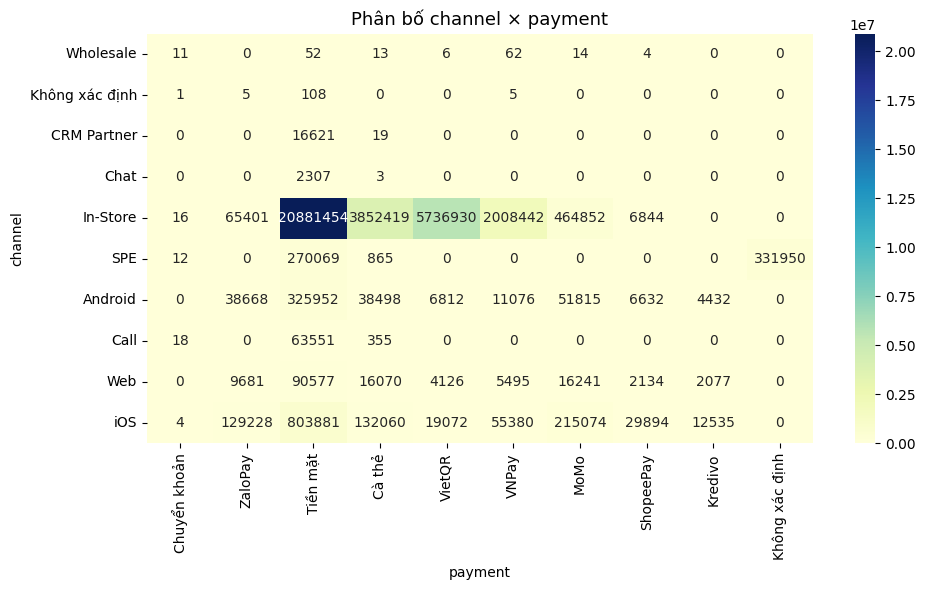

✅ Đã lưu biểu đồ heatmap channel × payment tại: ./images/history-chunk\channel_payment_heatmap.png


In [20]:
plot_crosstab_heatmap(history_df, "channel", "payment")

**Nhận xét:**
- **Kênh “In-Store”** chiếm áp đảo toàn bộ giao dịch, đặc biệt với hình thức **“Tiền mặt”** và **“Cà thẻ”** (màu đậm nhất trong heatmap).  
  → Điều này phù hợp với đặc thù bán lẻ truyền thống — phần lớn giao dịch trực tiếp tại cửa hàng.  
- Các kênh **iOS** và **Android** cũng có phân bố rõ rệt ở các ví điện tử như **MoMo, ZaloPay, VNPay**, phản ánh hành vi thanh toán phổ biến của người dùng di động.  
- Các kênh khác như **Web**, **SPE**, hoặc **Call** có số lượng giao dịch rất thấp, thể hiện **mức độ sử dụng hạn chế**.  
- Một vài kênh gần như không có dữ liệu thanh toán đáng kể (như **Wholesale**, **CRM Partner**, **Chat**), có thể là do đặc thù hoạt động riêng biệt hoặc dữ liệu bị thiếu.

C:\Users\tncn2\AppData\Local\Temp\ipykernel_15280\3486570824.py:36: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(values="len", index=col1, columns=col2)


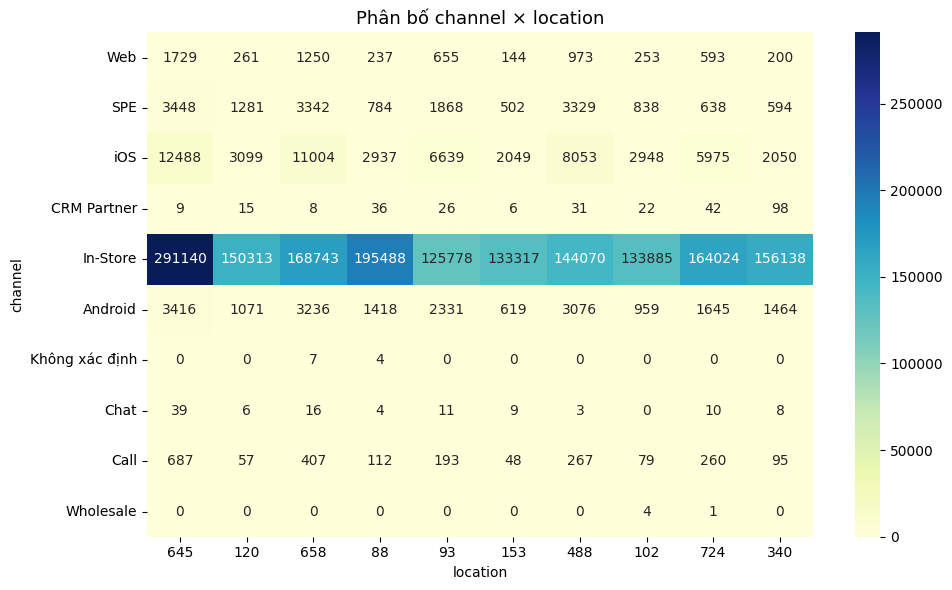

✅ Đã lưu biểu đồ heatmap channel × location tại: ./images/history-chunk\channel_location_heatmap.png


In [21]:
plot_crosstab_heatmap(history_df, "channel", "location")

C:\Users\tncn2\AppData\Local\Temp\ipykernel_15280\3486570824.py:36: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(values="len", index=col1, columns=col2)


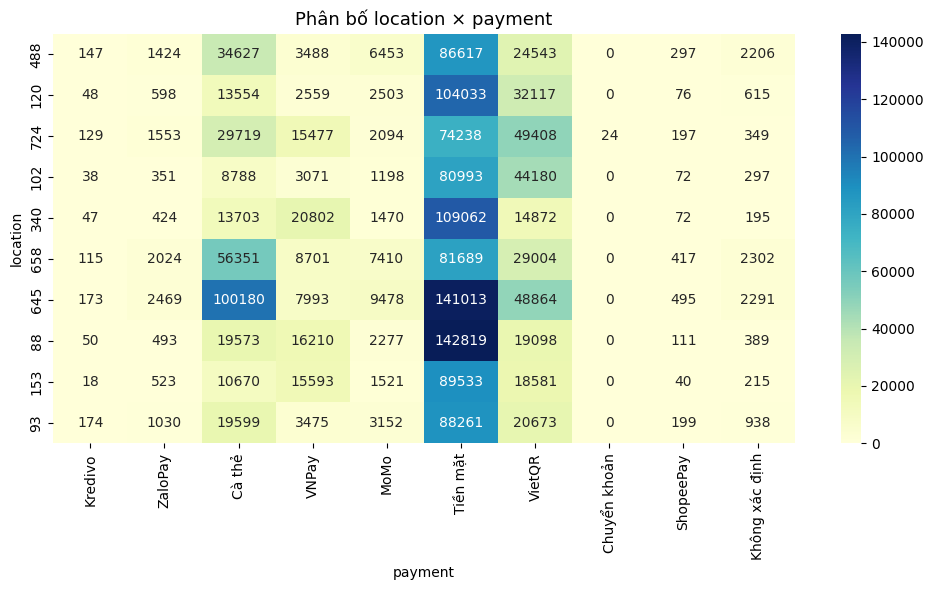

✅ Đã lưu biểu đồ heatmap location × payment tại: ./images/history-chunk\location_payment_heatmap.png


In [22]:
plot_crosstab_heatmap(history_df, "location", "payment")

In [6]:
def stacked100(df, row, col, top_row=10, top_col=8, outdir="./images/history-chunk", filename=None):
    os.makedirs(outdir, exist_ok=True)
    if filename is None:
        filename = f"stacked100_{row}_by_{col}.png"

    top_r = df.group_by(row).len().sort("len", descending=True).head(top_row)[row].to_list()
    top_c = df.group_by(col).len().sort("len", descending=True).head(top_col)[col].to_list()

    pv = (df.filter(pl.col(row).is_in(top_r) & pl.col(col).is_in(top_c))
            .group_by([row, col]).len()
            .pivot(values="len", index=row, columns=col)
            .fill_null(0))
    if pv.is_empty(): return None

    rows, cols = pv[row].to_list(), pv.columns[1:]
    M = pv.select(pl.exclude(row)).to_numpy().astype(float)
    M = M / M.sum(axis=1, keepdims=True)

    plt.figure(figsize=(10,5))
    left = np.zeros(M.shape[0])
    for j, c in enumerate(cols):
        plt.barh(rows, M[:,j], left=left, label=c)
        left += M[:,j]
    plt.xlabel("Tỷ lệ"); plt.ylabel(row)
    plt.title(f"Tỷ lệ {col} theo {row} (100%)")
    plt.legend(title=col, bbox_to_anchor=(1.02,1), loc="upper left")
    plt.tight_layout()

    path = os.path.join(outdir, filename)
    plt.savefig(path, dpi=300, bbox_inches="tight"); plt.close()
    print(path)
    return path

In [7]:
stacked100(history_df, "channel", "payment")
stacked100(history_df, "channel", "location")
stacked100(history_df, "payment", "location", top_row=12, top_col=10)

C:\Users\tncn2\AppData\Local\Temp\ipykernel_10500\2465017598.py:11: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(values="len", index=row, columns=col)


./images/history-chunk\stacked100_channel_by_payment.png
./images/history-chunk\stacked100_channel_by_location.png
./images/history-chunk\stacked100_payment_by_location.png


'./images/history-chunk\\stacked100_payment_by_location.png'

In [48]:
output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

df2 = (history_df
       .select([
           pl.col("price").cast(pl.Float64).alias("price"),
           pl.col("discount").cast(pl.Float64).alias("discount")
       ])
       .drop_nulls()
       .with_columns([
           pl.when(pl.col("price")   < 0).then(0).otherwise(pl.col("price")).alias("price"),
           pl.when(pl.col("discount")< 0).then(0).otherwise(pl.col("discount")).alias("discount"),
       ])
)

MAX_POINTS = 500_000
dfp = df2.sample(n=MAX_POINTS, with_replacement=False, seed=42) if df2.height > MAX_POINTS else df2

x = dfp["price"].to_list()
y = dfp["discount"].to_list()

# 3a) Scatter thường
plt.figure(figsize=(7,6))
sns.scatterplot(x=x, y=y, s=6, alpha=0.2, edgecolor=None)
plt.title("Scatter: price vs discount")
plt.xlabel("price"); plt.ylabel("discount")
plt.tight_layout()
p1 = os.path.join(output_folder, "scatter_price_discount.png")
plt.savefig(p1, dpi=300, bbox_inches="tight"); plt.close()
print("Lưu:", p1)

# 3b) Scatter log1p 
x_log = np.log1p(np.asarray(x)); y_log = np.log1p(np.asarray(y))
plt.figure(figsize=(7,6))
sns.scatterplot(x=x_log, y=y_log, s=6, alpha=0.2, edgecolor=None)
plt.title("Scatter (log1p): price vs discount")
plt.xlabel("log1p(price)"); plt.ylabel("log1p(discount)")
plt.tight_layout()
p2 = os.path.join(output_folder, "scatter_price_discount_log1p.png")
plt.savefig(p2, dpi=300, bbox_inches="tight"); plt.close()
print("Lưu:", p2)

plt.figure(figsize=(7,6))
plt.hexbin(x, y, gridsize=60, mincnt=1, bins="log", cmap="viridis")
plt.colorbar(label="log(count)")
plt.title("Hexbin: price vs discount")
plt.xlabel("price"); plt.ylabel("discount")
plt.tight_layout()
p3 = os.path.join(output_folder, "hexbin_price_discount.png")
plt.savefig(p3, dpi=300, bbox_inches="tight"); plt.close()
print("Lưu:", p3)

Lưu: ./images/history-chunk\scatter_price_discount.png
Lưu: ./images/history-chunk\scatter_price_discount_log1p.png
Lưu: ./images/history-chunk\hexbin_price_discount.png


**Nhận xét:**
- Sau khi log-transform, dữ liệu trở nên **phân bố rõ ràng hơn**, không còn bị dồn về góc (0, 0) như trước.  
- Có **xu hướng đồng biến nhẹ** giữa `price` và `discount`: sản phẩm có giá cao thường đi kèm với mức giảm giá lớn hơn.  
- Tuy nhiên, vẫn xuất hiện **dải điểm nằm ngang ở log(discount) = 0**, biểu thị những sản phẩm **không có giảm giá**.  
- Ngoài ra, vẫn tồn tại **một số cụm dày bất thường** ở các mức log(price) ~10–13 và log(discount) ~9–12, cho thấy khả năng **có nhóm sản phẩm giá cao được giảm mạnh theo chương trình nhất định**.  
- Không phát hiện mối quan hệ tuyến tính hoàn toàn.

In [8]:
df = history_df.select(["user_id", "customer_id"]).drop_nulls()

n_rows       = df.height
n_user       = df["user_id"].n_unique()
n_customer   = df["customer_id"].n_unique()
n_pairs      = df.unique().height

print(f"rows={n_rows:,} | unique user={n_user:,} | unique customer={n_customer:,} | unique pairs={n_pairs:,}")

u_to_c = (df.group_by("user_id")
            .agg(pl.col("customer_id").n_unique().alias("n_customer"))
            .sort("n_customer", descending=True))

c_to_u = (df.group_by("customer_id")
            .agg(pl.col("user_id").n_unique().alias("n_user"))
            .sort("n_user", descending=True))

pct_user_one_customer    = (u_to_c.filter(pl.col("n_customer")==1).height / u_to_c.height)
pct_customer_one_user    = (c_to_u.filter(pl.col("n_user")==1).height / c_to_u.height)

print(f"User -> Customer:  p(=1 customer) = {pct_user_one_customer:.2%},  max={u_to_c['n_customer'][0]}")
print(f"Customer -> User:  p(=1 user)     = {pct_customer_one_user:.2%},  max={c_to_u['n_user'][0]}")

if pct_user_one_customer==1 and pct_customer_one_user==1 and n_pairs==n_user==n_customer:
    print("Quan hệ 1–1 (một-một).")
elif pct_user_one_customer==1 and pct_customer_one_user<1:
    print("Quan hệ n–1: mỗi user gắn đúng 1 customer, nhưng 1 customer có nhiều user.")
elif pct_user_one_customer<1 and pct_customer_one_user==1:
    print("Quan hệ 1–n: mỗi customer gắn đúng 1 user, nhưng 1 user có nhiều customer.")
else:
    print("Quan hệ n–n: cả hai phía đều có bản ghi gắn nhiều đối tượng.")

print("\nTop user có >1 customer:")
print(u_to_c.filter(pl.col("n_customer")>1).head(10))

print("\nTop customer có >1 user:")
print(c_to_u.filter(pl.col("n_user")>1).head(10))

rows=35,729,825 | unique user=2,442,306 | unique customer=2,442,306 | unique pairs=2,442,306
User -> Customer:  p(=1 customer) = 100.00%,  max=1
Customer -> User:  p(=1 user)     = 100.00%,  max=1
Quan hệ 1–1 (một-một).

Top user có >1 customer:
shape: (0, 2)
┌─────────┬────────────┐
│ user_id ┆ n_customer │
│ ---     ┆ ---        │
│ str     ┆ u32        │
╞═════════╪════════════╡
└─────────┴────────────┘

Top customer có >1 user:
shape: (0, 2)
┌─────────────┬────────┐
│ customer_id ┆ n_user │
│ ---         ┆ ---    │
│ i32         ┆ u32    │
╞═════════════╪════════╡
└─────────────┴────────┘


**Phân tích quan hệ:**
- `User → Customer`: 100% user chỉ gắn với **một customer duy nhất**.  
- `Customer → User`: 100% customer chỉ gắn với **một user duy nhất**.  
- Không có trường hợp nào user hoặc customer liên kết với nhiều bên.

**Kết luận:**  
Quan hệ giữa **`user_id` và `customer_id` là một – một (1–1)**, thể hiện rằng **mỗi người dùng trong hệ thống tương ứng duy nhất với một khách hàng**.  

In [ ]:

output_folder = "./images/history-chunk"
os.makedirs(output_folder, exist_ok=True)

# Bao gồm: Int*, Float*, Decimal*, UInt*; loại trừ: Datetime, String, Boolean
numeric_cols = [c for c, dt in history_df.schema.items() if dt in pl.NUMERIC_DTYPES]


exclude = {"customer_id", "location"}  # ví dụ: location là mã khu vực (categorical)
numeric_cols = [c for c in numeric_cols if c not in exclude]

if len(numeric_cols) < 2:
    raise ValueError(f"Không đủ >=2 cột numerical để tính tương quan. Tìm thấy: {numeric_cols}")

# --- 2) Ép kiểu về Float64 để an toàn (kể cả Decimal) ---
df_num = history_df.select([pl.col(c).cast(pl.Float64).alias(c) for c in numeric_cols])

# --- 3) Tính Spearman: Pearson của thứ hạng ---
# Rank từng cột với phương pháp "average" cho ties
df_rank = df_num.select([pl.col(c).rank(method="average").alias(c) for c in numeric_cols])

# Ma trận thứ hạng (rows = samples, cols = variables)
R = df_rank.to_numpy()  # shape: (n_samples, n_features)

# Pearson correlation trên ma trận rank -> Spearman
spearman_corr = np.corrcoef(R, rowvar=False)  # shape: (n_features, n_features)

# --- 4) Vẽ heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    np.nan_to_num(spearman_corr, nan=0.0),  # tránh NaN khi có cột hằng
    annot=True, fmt=".2f", cmap="coolwarm", square=True,
    xticklabels=numeric_cols, yticklabels=numeric_cols
)
plt.title("Spearman Correlation (numeric columns)", fontsize=13)
plt.tight_layout()

# --- 5) Lưu ảnh ---
out_path = os.path.join(output_folder, "spearman_corr_numeric.png")
plt.savefig(out_path, bbox_inches="tight", dpi=300)
plt.close()
print(f"Đã lưu heatmap Spearman tại: {out_path}")

# --- 6) (Tuỳ chọn) Lưu ma trận ra CSV bằng Polars ---
spearman_pl = pl.DataFrame(spearman_corr, schema=numeric_cols).with_columns(
    pl.Series("feature", numeric_cols)
).select(["feature", *numeric_cols])

csv_path = os.path.join(output_folder, "spearman_corr_numeric.csv")
spearman_pl.write_csv(csv_path)
print(f"Đã lưu ma trận Spearman CSV tại: {csv_path}")

C:\Users\tncn2\AppData\Local\Temp\ipykernel_22068\3492777074.py:7: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  numeric_cols = [c for c, dt in history_df.schema.items() if dt in pl.NUMERIC_DTYPES]


Đã lưu heatmap Spearman tại: ./images/history-chunk\spearman_corr_numeric.png
Đã lưu ma trận Spearman CSV tại: ./images/history-chunk\spearman_corr_numeric.csv


In [15]:
df2 = history_df.select([
    pl.col("event_value").cast(pl.Float64).alias("y"),
    pl.col("quantity").cast(pl.Float64).alias("x"),
]).drop_nulls()

# 2) Kiểm tra có giống hệt nhau không (max |y - x| == 0)
same = df2.select((pl.col("y") - pl.col("x")).abs().max()).item() == 0.0

# 3) Pearson (≈1 nếu tuyến tính mạnh)
pearson = df2.select(pl.corr("y", "x")).item()

# 4) Spearman (đơn điệu hoàn hảo nếu =1.0)
# Cách A (nếu bản Polars hỗ trợ):
# spearman = df2.select(pl.spearman_rank_corr("y","x")).item()
# Cách B (an toàn mọi phiên bản): Pearson của thứ hạng
spearman = df2.select(
    pl.corr(pl.col("y").rank("average"), pl.col("x").rank("average"))
).item()

print(f"identical={same}, spearman={spearman:.6f}, pearson={pearson:.6f}")

identical=True, spearman=1.000000, pearson=1.000000


- `identical = True` → Hai cột **trùng khớp tuyệt đối** theo từng dòng.
- `Spearman = 1.000000` → **Quan hệ đơn điệu hoàn hảo** (xếp hạng giống hệt).
- `Pearson = 1.000000` → **Quan hệ tuyến tính hoàn hảo** (một cột là hằng số nhân/đổi đơn vị của cột kia).

**Kết luận**

- `event_value` và `quantity` **mang đúng cùng một thông tin** ⇒ **nên giữ 1 cột, bỏ 1 cột** để tránh dư thừa và đa cộng tuyến.


In [ ]:
def boxplot_by_cat(df, num_col, cat_col, top=10, outdir="./images/history-chunk", filename=None):
    os.makedirs(outdir, exist_ok=True)
    if filename is None:
        filename = f"box_{num_col}_by_{cat_col}.png"

    # Lọc top nhóm để tránh quá nhiều nhãn
    top_vals = (df.group_by(cat_col).len()
                  .sort("len", descending=True)
                  .head(top)[cat_col].to_list())
    
    sub = (df.filter(pl.col(cat_col).is_in(top_vals))
             .select([pl.col(num_col).cast(pl.Float64), pl.col(cat_col)])
             .drop_nulls())

    if sub.height == 0:
        print(f"Không có dữ liệu hợp lệ cho {num_col} theo {cat_col}")
        return None

    plt.figure(figsize=(9,5))
    sns.boxplot(x=sub[cat_col].to_list(), y=sub[num_col].to_list())
    plt.xticks(rotation=25, ha="right")
    plt.title(f"Phân phối {num_col} theo {cat_col}")
    plt.xlabel(cat_col); plt.ylabel(num_col)
    plt.tight_layout()

    path = os.path.join(outdir, filename)
    plt.savefig(path, dpi=300, bbox_inches="tight")
    plt.close()
    print(path)
    return path

In [10]:
# Boxplot: price theo channel
boxplot_by_cat(history_df, num_col="price", cat_col="channel",
               top=12, filename="box_price_by_channel.png")

# Boxplot: price theo payment
boxplot_by_cat(history_df, num_col="price", cat_col="payment",
               top=12, filename="box_price_by_payment.png")

./images/history-chunk\box_price_by_channel.png
./images/history-chunk\box_price_by_payment.png


'./images/history-chunk\\box_price_by_payment.png'

In [11]:
def boxplot_log(df, num_col, cat_col, top=10, outdir="./images/history-chunk", filename=None):
    os.makedirs(outdir, exist_ok=True)
    if filename is None:
        filename = f"boxlog_{num_col}_by_{cat_col}.png"

    # Lấy top nhóm phổ biến nhất
    top_vals = (df.group_by(cat_col).len()
                  .sort("len", descending=True)
                  .head(top)[cat_col].to_list())

    # Lấy dữ liệu numeric + log transform
    sub = (df.filter(pl.col(cat_col).is_in(top_vals))
             .select([pl.col(cat_col), pl.col(num_col).cast(pl.Float64)])
             .drop_nulls())
    if sub.height == 0:
        print(f"Không có dữ liệu cho {num_col} theo {cat_col}")
        return None

    sub = sub.with_columns(np.log1p(pl.col(num_col)).alias("log_val"))

    # Vẽ boxplot
    plt.figure(figsize=(9,5))
    sns.boxplot(x=sub[cat_col].to_list(), y=sub["log_val"].to_list(), color="lightblue")
    plt.xticks(rotation=25, ha="right")
    plt.title(f"log(1+{num_col}) theo {cat_col}")
    plt.xlabel(cat_col); plt.ylabel(f"log(1+{num_col})")
    plt.tight_layout()

    path = os.path.join(outdir, filename)
    plt.savefig(path, dpi=300, bbox_inches="tight")
    plt.close()
    print("✅ Lưu tại:", path)
    return path

In [12]:
# Boxplot log(1+price) theo channel
boxplot_log(history_df, "price", "channel", filename="boxlog_price_by_channel.png")

# Boxplot log(1+price) theo payment
boxplot_log(history_df, "price", "payment", filename="boxlog_price_by_payment.png")

✅ Lưu tại: ./images/history-chunk\boxlog_price_by_channel.png
✅ Lưu tại: ./images/history-chunk\boxlog_price_by_payment.png


'./images/history-chunk\\boxlog_price_by_payment.png'

# Task 3: 
- Những trường thông tin nào không có nhiều thông tin --> nên loại bỏ
- Những trường thông tin nào cần xử lý NULL
- Những trường thông tin nào cần xử lý ngoại lệ (Outlier)
- Những trường thông tin nào cần xử lý phân bố không đều?

# Sau đây là các bước cần làm ở **data preprocessing** sau khi EDA

---

## I. Xử lý các trường **không có nhiều thông tin**
**Gồm:** `event_type`, `is_deleted`

### 1) `event_type`
- **Lý do (EDA):** Chỉ có **1 giá trị duy nhất** `"Purchase"` trên **35.7M** dòng → biến hằng, **không mang thông tin phân tách**.
- **Xử lý:** **Loại bỏ** khỏi tập đặc trưng.

### 2) `is_deleted`
- **Lý do (EDA):** Toàn bộ bản ghi có giá trị **`false` (35.7M/35.7M)** → biến hằng.
- **Xử lý:** **Loại bỏ** khỏi tập đặc trưng.

---

## II. Xử lý các trường **có ngoại lệ (Outlier)**
**Gồm:** `price`, `quantity`, `discount`

### 1) `price`
- **Lý do (EDA):**
  - **Mean = 169,188₫**, **Median = 87,000₫**, **Std ≈ 195,540₫**, **Min ≈ 0.044₫**, **Max ≈ 20,990,000₫** → **lệch phải mạnh**, có **rất nhiều outlier**; giá cực thấp khả năng **lỗi nhập liệu**.
  - Histogram (log) có **2 đỉnh** (≈ **log 10–12.5** tương đương **22k–270k**), Boxplot có nhiều điểm cực trị.
- **Xử lý đề xuất:**
  - Dùng **log1p** khi model/visualize.
  - **Làm sạch min bất thường** (ví dụ loại < 100₫ hoặc kiểm tra nguồn).
  - **Winsorize/clip** ở **[1%, 99%]** hoặc theo **IQR** cho modeling nhạy cảm với outlier.

### 2) `quantity`
- **Lý do (EDA):**
  - Phần lớn **= 1**, có **đuôi rất dài** (khách nhiều đơn) → **right-skewed**, xuất hiện nhiều điểm xa (outlier).
  - `quantity` **trùng hoàn toàn** với `event_value` (xem mục V) ⇒ nên giữ **một cột**.
- **Xử lý đề xuất:**
  - Dùng **log1p(quantity)** cho phân tích/mô hình.
  - Nếu cần khử nhiễu, **clip** ở **P99** (hoặc IQR).
  - **Giữ `quantity`, bỏ `event_value`** để tránh trùng thông tin.

### 3) `discount`
- **Lý do (EDA):**
  - **Median = 0**, **Mean ≈ 17,235**, **Std ≈ 46,674**, **Max ≈ 7,995,000** → **lệch phải rất mạnh**.
  - Histogram **2 đỉnh**: **đỉnh lớn tại 0** (không giảm) và **đỉnh nhỏ tại log≈10** (giảm thật sự) → **hai nhóm tự nhiên**.
- **Xử lý đề xuất:**
  - Dùng **log1p(discount)** cho mô hình.
  - Tạo biến **nhị phân**: `has_discount = (discount > 0)` để tách **2 nhóm**.
  - Với mô hình nhạy outlier: **clip** ở **P99** (giữ lại cấu trúc nhưng giảm ảnh hưởng cực trị).

---

## IV. Xử lý các trường **có phân bố không đồng đều**
**Gồm:** `location`, `discount`, `channel`

### 1) `location`
- **Lý do (EDA):** Rất mất cân bằng: một số `location` có **>300k** bản ghi, đa số chỉ **vài trăm** → ngay cả thang **log** vẫn thấy **chênh lệch lớn**.
- **Xử lý đề xuất:**
  - **Gộp/nhóm** các `location` hiếm thành `"Other"` theo ngưỡng (ví dụ < 0.1% tổng số).
  - Dùng **target/frequency encoding** thay vì one-hot tràn chiều.
  - **Stratify** theo `location` khi chia train/test.

### 2) `discount` (không đồng đều 0 vs >0)
- **Lý do (EDA):** **Áp đảo ở 0** (không giảm), phần còn lại tập trung quanh log≈10.
- **Xử lý đề xuất:**
  - Tạo biến **`has_discount`** để mô hình nắm được **mất cân bằng** giữa hai nhóm.
  - Khi đánh giá, **báo cáo theo từng nhóm** `has_discount`.

### 3) `channel`
- **Lý do (EDA):** **“In-Store” ≈ 33,016,358/35,729,825 (>90%)**. Các kênh như **TKS/Wholesale** cực hiếm.
- **Xử lý đề xuất:**
  - **Gộp** kênh hiếm vào `"Other"`.
  - Khi huấn luyện, cân nhắc **class weighting** hoặc **stratified split** theo `channel`.
  - Phân tích kết quả **riêng theo kênh** để tránh thiên lệch từ “In-Store”.

---

## V. Xử lý các **cặp trường có độ tương quan cao**
**Gồm:** `user_id` ↔ `customer_id`, `event_value` ↔ `quantity`

### 1) `user_id` và `customer_id`
- **Bằng chứng (EDA):**
  - **rows=35,729,825**, **unique user=2,442,306**, **unique customer=2,442,306**, **unique pairs=2,442,306**.  
  - **User→Customer = 100% 1-1**, **Customer→User = 100% 1-1**.
- **Kết luận & xử lý:** Hai cột **trùng thực thể** (quan hệ **1–1**) → **giữ 1 cột** (tuỳ nghiệp vụ: hành vi ⇒ `user_id`; giao dịch/CRM ⇒ `customer_id`).

### 2) `event_value` và `quantity`
- **Bằng chứng (EDA):**  
  `identical = True`, **Spearman = 1.000000**, **Pearson = 1.000000** → **trùng khớp tuyệt đối / tuyến tính hoàn hảo**.
- **Kết luận & xử lý:** Hai cột **mang cùng thông tin** → **giữ 1 cột** (khuyến nghị **`quantity`**) để **tránh dư thừa và đa cộng tuyến**.